# Evaluate modENCODE FPKM of Adult Worms

Map the average expressions from the FPKM data to WormCat Categories and calculate some basic stats.

The question we are asking: 

* __Is the expression levels for Unassigned Genes similar to other Wormcat categories?__

__Answer: Yes__
* Unassigned Genes have a _Mean_ FPKM Expression  of ___28___ and fall in the ___Third quartile___ when compared to all other Wormcat categories
* Unassigned Genes have a _Std_ FPKM Expression of ___180___ and falls in the ___Second quartile___ when compared to all other Wormcat categories

---
Notes:
* There are 492 Genes in WormCat that are not in ModENCODE
* Unique Categories
  * Category 1 has 34 unique categories.
  * Category 2 has 249 unique categories.
  * Category 3 has 471 unique categories.



In [1]:
import pandas as pd


In [2]:
# Read in the Wormcat Catalog
wormcat_df = pd.read_csv('./input_data/whole_genome_v2_nov-11-2021.csv')

In [3]:
wormcat_df

,sequence_id,wormbase_id,category_1,category_2,category_3
0,F15H10.3,WBGene00000144,Cell cycle,Cell cycle: APC,Cell cycle: APC
1,F35G12.9,WBGene00000145,Cell cycle,Cell cycle: APC,Cell cycle: APC
2,C09H10.7,WBGene00007501,Cell cycle,Cell cycle: APC,Cell cycle: APC
3,K06H7.6,WBGene00000143,Cell cycle,Cell cycle: APC,Cell cycle: APC
4,B0511.9,WBGene00015235,Cell cycle,Cell cycle: APC,Cell cycle: APC
...,...,...,...,...,...
31384,F56F4.2,WBGene00018979,Unassigned,Unassigned,Unassigned: TransThyretin-Related family domain
31385,F56F4.9,WBGene00050896,Unassigned,Unassigned,Unassigned: TransThyretin-Related family domain
31386,F46B3.18,WBGene00050892,Unassigned,Unassigned,Unassigned: TransThyretin-Related family domain
31387,F56F4.1,WBGene00018978,Unassigned,Unassigned,Unassigned: TransThyretin-Related family domain


In [4]:
# Read in the Excel Sheet to get the Tab Names
xlsx_file_nm = './input_data/fpkm_adult.xlsx'
fpkm_adult_xlsx = pd.ExcelFile(xlsx_file_nm)

In [5]:
sheet_names = fpkm_adult_xlsx.sheet_names
sheet_names

['fpkm_adult',
 'fpkm_SRX103988',
 'fpkm_SRX047787',
 'fpkm_SRX103989',
 'fpkm_SRX001873',
 'fpkm_SRX103987',
 'comp FPKM',
 'Sheet8']

In [6]:
# Read the 'comp FPKM' Tab
fpkm_df = pd.read_excel(xlsx_file_nm, sheet_name='comp FPKM')

In [7]:
fpkm_df

,Gene.ID,Unnamed: 1,SRX103988,SRX047787,SRX103989,SRX001873,SRX103987,average adult FPKMs,st dev
0,WBGene00000001,NaN,31.480000,25.728500,32.260399,35.143200,35.114700,32.061700,4.433409
1,WBGene00000002,NaN,2.604640,3.548910,2.617860,4.966840,2.511030,3.411160,1.137054
2,WBGene00000003,NaN,2.117680,4.936450,2.619580,12.002700,1.794770,5.338375,4.637663
3,WBGene00000004,NaN,2.424100,3.732810,2.599120,7.173490,3.114860,4.155070,2.064960
4,WBGene00000005,NaN,5.929550,8.643980,6.277350,13.604900,6.451470,8.744425,3.414597
...,...,...,...,...,...,...,...,...,...
47151,WBGene00306076,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
47152,WBGene00306078,NaN,0.422550,4.291390,1.280830,4.775030,0.672952,2.755050,2.077588
47153,WBGene00306080,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
47154,WBGene00306081,NaN,7.523390,3.414220,1.120340,3.843730,3.678110,3.014100,1.274836


In [9]:
# Merge the data joining on the Wormbase ID use a Left join as to not drop any wormcat rows
wormcat_w_fpkm_df = pd.merge(wormcat_df, fpkm_df, left_on='wormbase_id', right_on='Gene.ID', how='left')


In [10]:
# Check how many Wormbase IDs do not have a fpkm from ModENCODE
# there are 492 Genes in WormCat that are not in ModENCODE
missing = wormcat_w_fpkm_df['Gene.ID'].isna()
missing.value_counts()

False    30897
True       492
Name: Gene.ID, dtype: int64

In [11]:
# OK Now we that we know how many rows are missing data we can drop them so they dont mess up the stats

wormcat_w_fpkm_df = wormcat_w_fpkm_df[~wormcat_w_fpkm_df['Gene.ID'].isna()]
wormcat_w_fpkm_df = wormcat_w_fpkm_df.drop(['Unnamed: 1','Gene.ID'], axis=1)
wormcat_w_fpkm_df.rename(columns={'average adult FPKMs': 'Avg_FPKM','st dev':'Std_FPKM'}, inplace=True)
wormcat_w_fpkm_df

,sequence_id,wormbase_id,category_1,category_2,category_3,SRX103988,SRX047787,SRX103989,SRX001873,SRX103987,Avg_FPKM,Std_FPKM
0,F15H10.3,WBGene00000144,Cell cycle,Cell cycle: APC,Cell cycle: APC,50.222500,37.024601,61.244598,47.211899,56.919601,50.600175,10.786033
1,F35G12.9,WBGene00000145,Cell cycle,Cell cycle: APC,Cell cycle: APC,73.586601,64.828102,70.312599,64.244598,100.278000,74.915825,17.127627
2,C09H10.7,WBGene00007501,Cell cycle,Cell cycle: APC,Cell cycle: APC,21.317499,17.926500,33.645199,26.924200,24.469000,25.741225,6.495145
3,K06H7.6,WBGene00000143,Cell cycle,Cell cycle: APC,Cell cycle: APC,21.802601,24.828699,22.837000,37.544201,24.061100,27.317750,6.866794
4,B0511.9,WBGene00015235,Cell cycle,Cell cycle: APC,Cell cycle: APC,41.925301,80.498901,58.691002,76.154900,60.333698,68.919625,11.026811
...,...,...,...,...,...,...,...,...,...,...,...,...
31384,F56F4.2,WBGene00018979,Unassigned,Unassigned,Unassigned: TransThyretin-Related family domain,0.000000,0.252254,0.000000,0.491289,0.000000,0.185886,0.235784
31385,F56F4.9,WBGene00050896,Unassigned,Unassigned,Unassigned: TransThyretin-Related family domain,1.074310,1.502010,1.992080,2.112230,1.631950,1.809567,0.289284
31386,F46B3.18,WBGene00050892,Unassigned,Unassigned,Unassigned: TransThyretin-Related family domain,0.000000,0.192923,0.000000,0.565773,0.346892,0.276397,0.239493
31387,F56F4.1,WBGene00018978,Unassigned,Unassigned,Unassigned: TransThyretin-Related family domain,2.847790,0.134487,1.779120,1.046570,1.458150,1.104582,0.712849


In [13]:
# How many unique cataegory items are there in each main category?
for c in ['category_1','category_2','category_3']:
    category = wormcat_w_fpkm_df[c].value_counts()
    print(f'{c} has {len(category)} unique categories.')

category_1 has 34 unique categories.
category_2 has 249 unique categories.
category_3 has 471 unique categories.


In [14]:
import os

os.getcwd() 


'/media/data1/Code/Notebooks/UMass_Med/unknown_genes'

In [20]:
# Calculate some basic stats and Write to an excel sheet
data = {}
for category in ['category_1','category_2','category_3']:
    grouped = wormcat_w_fpkm_df.groupby(category)
    column_nm='Avg_FPKM'
    stat_mean = grouped[column_nm].mean()
    stat_mean.name = 'mean'
    stat_count = grouped[column_nm].count()
    stat_count.name= 'count'
    stat_min = grouped[column_nm].min()
    stat_min.name = 'min'
    stat_max = grouped[column_nm].max()
    stat_max.name = 'max'
    stat_std = grouped[column_nm].std()
    stat_std.name = 'std'
    stats = pd.concat([stat_mean, stat_std, stat_count, stat_min, stat_max], axis=1)
    stats
    #print(stats)
    data[category]=stats
    mode = 'w' if category=='category_1' else 'a'
    with pd.ExcelWriter('./output_data/wormcat_modencode.xlsx', engine='openpyxl', mode=mode) as writer:
        stats.to_excel(writer, sheet_name=category)


In [22]:
# write the FULL details to the excel sheet
with pd.ExcelWriter('./output_data/wormcat_modencode.xlsx', engine='openpyxl', mode='a') as writer:
        wormcat_w_fpkm_df.to_excel(writer, sheet_name='full detail', index=False)

In [23]:
grouped = wormcat_w_fpkm_df.groupby('category_1')
stat = grouped['Avg_FPKM'].std()
stat.sort_values()

category_1
Cilia                                     11.838122
Peroxisome                                25.142942
Globin                                    39.042141
DNA                                       48.607291
Transcription: unassigned                 55.422092
Nucleic acid                              56.575503
Transmembrane protein                     59.501129
Cell cycle                                60.060496
Nuclear pore                              62.462525
Transcription: general machinery          62.832668
Transcription factor                      72.476916
Transcription: dosage compensation        77.343481
Neuronal function                         80.077378
Transmembrane transport                   91.381859
Trafficking                               98.903136
Signaling                                100.108140
Cytoskeleton                             120.824509
Lysosome                                 136.346489
Unassigned                               180.564641
P

In [24]:
grouped = wormcat_w_fpkm_df.groupby('category_1')
stat = grouped['Avg_FPKM'].mean()
stat.sort_values()

category_1
Cilia                                    3.818455
Transcription factor                     9.930257
Transmembrane protein                   10.099833
Globin                                  10.120877
Pseudogene                              10.348229
Transmembrane transport                 16.171068
Neuronal function                       21.420813
Signaling                               22.908434
Peroxisome                              23.534784
Nucleic acid                            24.535820
Unassigned                              28.057929
Transcription: dosage compensation      34.039207
DNA                                     36.043508
Proteolysis proteasome                  42.373716
Cytoskeleton                            43.917535
Stress response                         44.249678
Transcription: unassigned               44.826990
Proteolysis general                     48.664258
Transcription: general machinery        48.963049
Trafficking                            

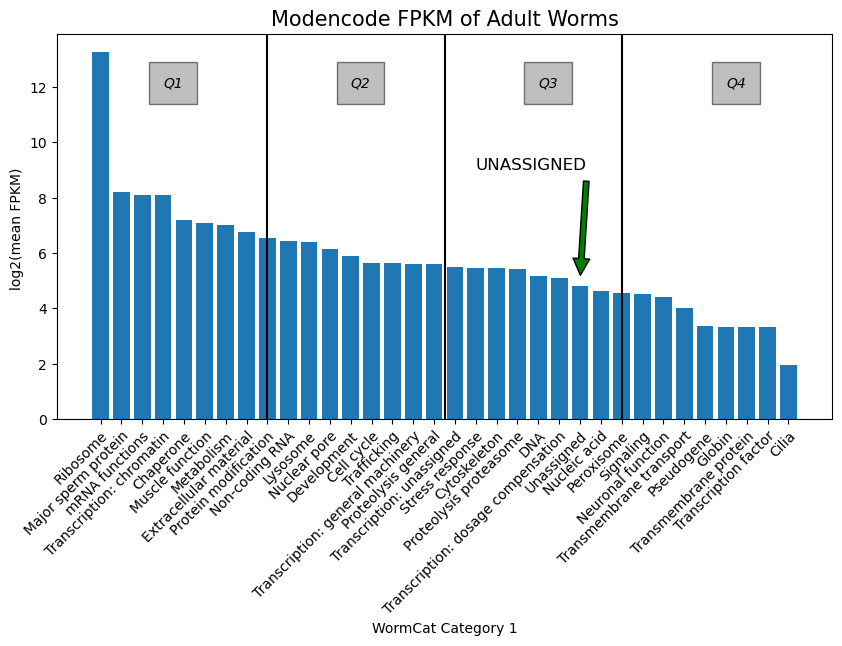

In [25]:
import matplotlib.pyplot as plt
import numpy as np


Category_1_mean = data['category_1']['mean'].sort_values(ascending=False)
Category_1_mean.index

x = Category_1_mean.index
y = np.log2(Category_1_mean.values)
#y = Category_1_mean.values


fig, ax = plt.subplots(figsize=(10, 5))
# Create bar plot
plt.bar(x, y)

# Set title and labels
plt.title("Modencode FPKM of Adult Worms",fontsize=15)
plt.ylabel("log2(mean FPKM) ")
plt.xlabel("WormCat Category 1")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Show plot
# Adding annotation on the plot.
ax.annotate('UNASSIGNED', xy=(23, 5), xytext=(18, 9), fontsize=12,
            arrowprops=dict(facecolor='green', shrink=0.05))

# only one line may be specified; full height
plt.axvline(x = 8, color = 'black', label = 'axvline - full height')
plt.axvline(x = 16.5, color = 'black', label = 'axvline - full height') 
plt.axvline(x = 25, color = 'black', label = 'axvline - full height') 

ax.text(3, 12, 'Q1', style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
ax.text(12, 12, 'Q2', style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
ax.text(21, 12, 'Q3', style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
ax.text(30, 12, 'Q4', style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})

plt.show()


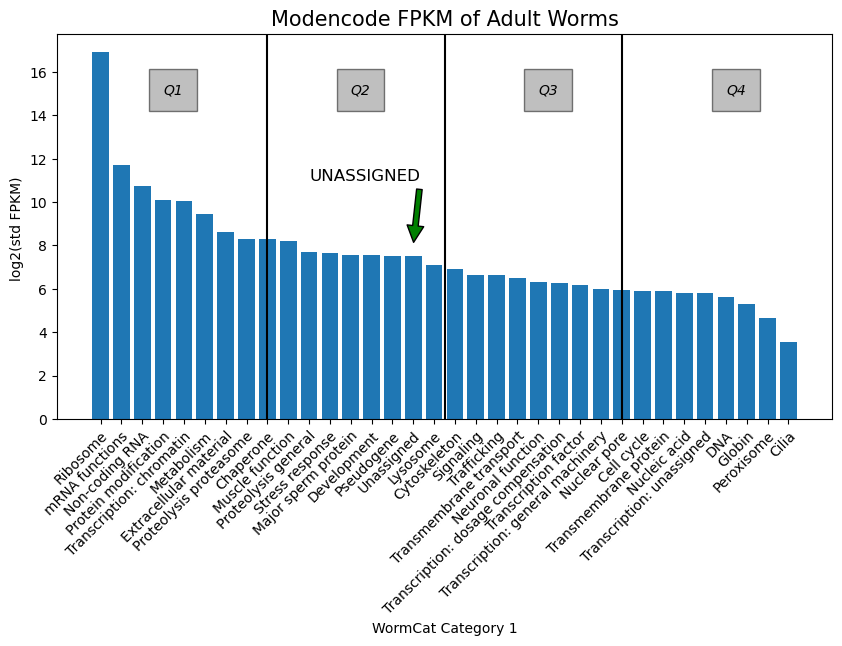

In [27]:
import matplotlib.pyplot as plt
import numpy as np


Category_1_mean = data['category_1']['std'].sort_values(ascending=False)
Category_1_mean.index

x = Category_1_mean.index
y = np.log2(Category_1_mean.values)
#y = Category_1_mean.values


fig, ax = plt.subplots(figsize=(10, 5))
# Create bar plot
plt.bar(x, y)

# Set title and labels
plt.title("Modencode FPKM of Adult Worms",fontsize=15)
plt.ylabel("log2(std FPKM) ")
plt.xlabel("WormCat Category 1")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Show plot
# Adding annotation on the plot.
ax.annotate('UNASSIGNED', xy=(15, 8), xytext=(10, 11), fontsize=12,
            arrowprops=dict(facecolor='green', shrink=0.05))

# only one line may be specified; full height
plt.axvline(x = 8, color = 'black', label = 'axvline - full height')
plt.axvline(x = 16.5, color = 'black', label = 'axvline - full height') 
plt.axvline(x = 25, color = 'black', label = 'axvline - full height') 

ax.text(3, 15, 'Q1', style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
ax.text(12, 15, 'Q2', style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
ax.text(21, 15, 'Q3', style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
ax.text(30, 15, 'Q4', style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})


plt.show()